Dicoding Submission (Belajar Mechine Learning untuk Pemula) Nama: Sari Nurbaiti // email: sarinurbaiti850@gmail.com // No Hp/WA : 085783778776

In [1]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O /tmp/rockpaperscissors.zip

--2021-07-17 04:42:35--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.09MB/s    in 44s     

2021-07-17 04:43:20 (6.97 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
from zipfile import ZipFile
import os

# Membaca & mengekstak file dataset
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [4]:
# Menampilkan listnya
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt']

In [5]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [6]:
pip install split-folders

In [8]:
# Mendefinisikan nama direktori untuk data latih dan data validasi
import splitfolders
base_dir = "/tmp/rockpaperscissors/rps-cv-images"
splitfolders.ratio(base_dir, output = "/tmp/rockpaperscissors/", seed=1337, ratio = (.6, .4))
train_dir = os.path.join("/tmp/rockpaperscissors","train")
validation_dir = os.path.join("/tmp/rockpaperscissors","val")

Copying files: 2188 files [00:00, 3388.76 files/s]


In [9]:
!rm /tmp/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt

In [11]:
# Membuat direktori pd masing-masing komponen yaitu rock, paper, dan scissors
base_rock_dir = os.path.join (base_dir, 'rock')
base_paper_dir = os.path.join (base_dir, 'paper')
base_scissors_dir = os.path.join (base_dir, 'scissors')

In [12]:
# Mengatur untuk train
train_rock_is = os.path.join(train_dir, 'rock')
train_paper_is = os.path.join (train_dir, 'paper')
train_scissors_is = os.path.join (train_dir,'scissors') 

In [13]:
# Mengatur untuk val
valid_rock_is = os.path.join(validation_dir,'rock')
valid_paper_is = os.path.join (validation_dir, 'paper')
valid_scissors_is = os.path.join (validation_dir, 'scissors')

In [14]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(
                    rotation_range=20,
                    rescale=1./255,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rotation_range=20,
                    rescale=1./255,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [16]:
# Proses image data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    class_mode='categorical', # karena yang kita kerjakan merupakan masalah klasifikasi 3 kelas
    target_size=(150,150), # mengubah resolusi seluruh gambar
    batch_size=4
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    class_mode='categorical',# karena yang kita kerjakan merupakan masalah klasifikasi 3 kelas
    target_size=(150,150), # mengubah resolusi seluruh gambar
    batch_size=4
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [18]:
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history = model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=25,
      validation_data=validation_generator, 
      validation_steps=5,  
      verbose=2)
model.save("rps.h5")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [19]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
epoch = range(len(accuracy))
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

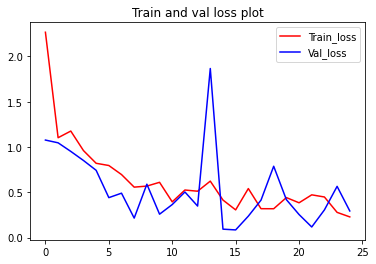

<Figure size 432x288 with 0 Axes>

In [20]:
#Membuat grafik untuk training dan validation loss
plt.plot(epoch, loss, 'r', label='Train_loss')
plt.plot(epoch, validation_loss, 'b', label='Val_loss')
plt.title('Train and val loss plot')
plt.legend(loc=0)
plt.figure()

plt.show()

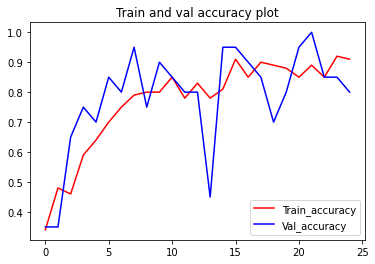

<Figure size 432x288 with 0 Axes>

In [21]:
#Membuat grafik untuk training dan validation accuracy
plt.plot(epoch, accuracy, 'r', label='Train_accuracy')
plt.plot(epoch, validation_accuracy, 'b', label='Val_accuracy')
plt.title('Train and val accuracy plot')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving tangan3.png to tangan3 (1).png
tangan3.png
rock


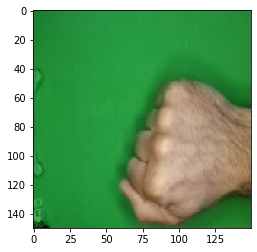

In [25]:
#prediksi model
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # Memprediksi gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0] !=0:
    print('Paper')
  elif classes[0,1] !=0:
    print('rock')
  else:
    print('scissors')